<a href="https://colab.research.google.com/github/cristhiansito123/mai_hand/blob/main/scripts/training/training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Llamado de los landsmark

In [73]:
import json
import requests
import os
import shutil
import time
import sys

import numpy as np
import pandas as pd

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [75]:
train_path = '/content/drive/MyDrive/signal_language/asl_dataset'


In [76]:
metadata_path = train_path+'/landmarks.csv'

metadata = pd.read_csv(metadata_path, sep=',')

In [77]:
metadata

landsmark_1  landsmark_2  landsmark_3
0                        0          NaN          NaN
1       0.3102450370788574     0.288275     0.000001
2       0.3280085325241089     0.337626    -0.162799
3      0.35471075773239136     0.340804    -0.269532
4       0.3977852761745453     0.336653    -0.344249
...                    ...          ...          ...
43401   0.5494341254234314     0.600862    -0.125423
43402  0.34248074889183044     0.633339    -0.088369
43403   0.3210158944129944     0.550129    -0.183870
43404   0.4415202736854553     0.619687    -0.151251
43405   0.4862281084060669     0.670619    -0.100010

[43406 rows x 3 columns]

In [78]:
len(metadata)

43406

In [79]:
labels = []
landsmark = []
for i in range(int(len(metadata)/22)):
  labels.append(metadata.iloc[22*i]['landsmark_1'])
  temp = []
  for j in range(21):
    temp.append(metadata.iloc[22*i+j+1].values)
  landsmark.append(temp)


In [80]:
landsmark

[[array(['0.3102450370788574', 0.2882751822471618, 1.2685443380178183e-06],
        dtype=object),
  array(['0.3280085325241089', 0.3376258313655853, -0.1627985388040542],
        dtype=object),
  array(['0.35471075773239136', 0.340803861618042, -0.2695319652557373],
        dtype=object),
  array(['0.3977852761745453', 0.3366531133651733, -0.3442491292953491],
        dtype=object),
  array(['0.4249657094478607', 0.3435882329940796, -0.4133390188217163],
        dtype=object),
  array(['0.3034326434135437', 0.1374398469924926, -0.258615106344223],
        dtype=object),
  array(['0.4769062399864197', 0.1443537771701812, -0.3395959436893463],
        dtype=object),
  array(['0.5734642148017883', 0.1829541325569152, -0.3769940733909607],
        dtype=object),
  array(['0.6344150304794312', 0.2148019671440124, -0.3992522656917572],
        dtype=object),
  array(['0.3278300166130066', 0.0627278089523315, -0.207672894001007],
        dtype=object),
  array(['0.5025702118873596', 0.067857

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [82]:
landsmark = np.asarray(landsmark)

In [83]:
landsmark = landsmark.reshape(landsmark.shape[0], landsmark.shape[1]*landsmark.shape[2])

In [84]:
labels = np.asarray(labels)

In [85]:
x_train, x_test, y_train, y_test = train_test_split(landsmark, labels, test_size=0.2, shuffle=True, stratify=labels)

In [86]:
model = RandomForestClassifier()

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

score = accuracy_score(y_predict, y_test)

print('{}% de muestras fueron clasificadas correctamente !'.format(score * 100))



94.9367088607595% de muestras fueron clasificadas correctamente !


Se guarda el modelo entrenado en el drive

In [87]:
import joblib

In [88]:
destination = '/content/drive/MyDrive/signal_language/asl_dataset/random_forest_model.pkl'

# Tu código para crear y ajustar el modelo RandomForestClassifier

# Guardar el modelo en Google Drive
joblib.dump(model, destination)

['/content/drive/MyDrive/signal_language/asl_dataset/random_forest_model.pkl']

Precisión (Precision)

In [89]:
from sklearn.metrics import precision_score

precision = precision_score(y_predict, y_test,average='micro')
print('{}% es la precisión del modelo !'.format(precision * 100))

94.9367088607595% es la precisión del modelo !


Recall score

In [90]:
from sklearn.metrics import recall_score

recall = recall_score( y_predict,y_test, average = 'macro')
print('{}% es la métrica recall score !'.format(recall * 100))

95.0868961285628% es la métrica recall score !


F1 score

In [91]:
from sklearn.metrics import f1_score

f1 = f1_score( y_predict,y_test, average = 'weighted')
print('{}% es la métrica F1 score !'.format(f1 * 100))

95.01548734253649% es la métrica F1 score !


Matriz de confusión

In [96]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_predict,y_test )

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

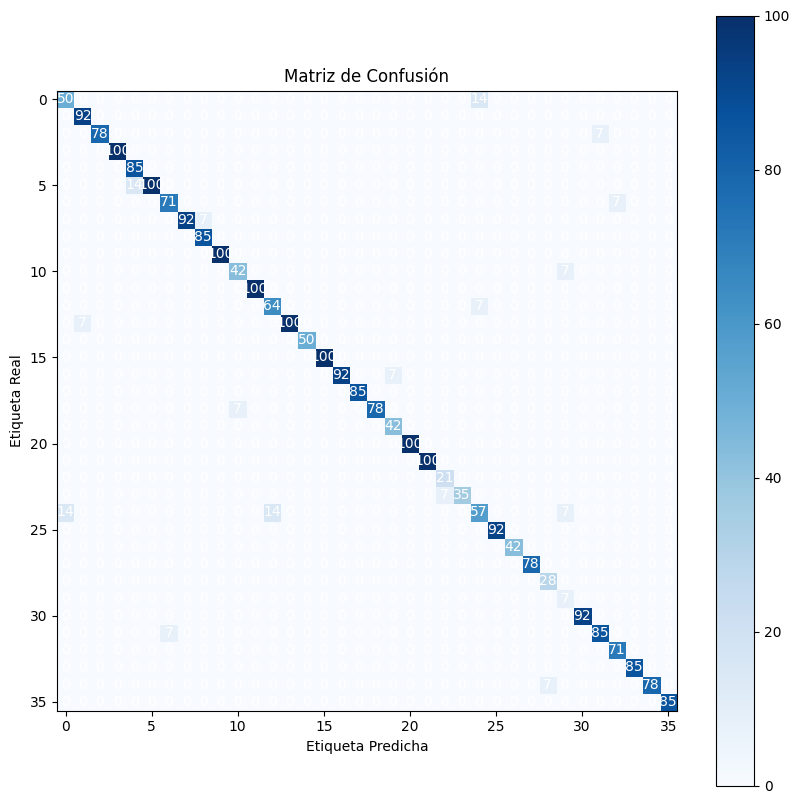

In [98]:
fig, ax = plt.subplots(figsize=(10, 10))

# Configurar mapa de colores
cmap = plt.cm.Blues
normalized_matrix = confusion_matrix / np.max(confusion_matrix) * 100
# Graficar matriz de confusión
im = ax.imshow(normalized_matrix, interpolation='nearest', cmap=cmap)

# Configurar título y etiquetas de los ejes
ax.set_title('Matriz de Confusión')
ax.set_xlabel('Etiqueta Predicha')
ax.set_ylabel('Etiqueta Real')

# Mostrar los valores de la matriz en cada celda
for i in range(normalized_matrix.shape[0]):
    for j in range(normalized_matrix.shape[1]):
        ax.text(j, i, int(normalized_matrix[i, j]), ha='center', va='center', color='white')

# Mostrar la barra de colores
cbar = ax.figure.colorbar(im, ax=ax)

# Mostrar la figura
plt.show()